### Name - Shubham Paltankar

### Task 2 - prediction using Unsupervised ML


#### From the 'Iris' dataset predict the optium number of clusters and predict it visually 

##### Importing the Libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree
import seaborn as sns

##### Loading the Dataset

In [13]:
iris = pd.read_csv("C:/Users/SHUBHAM/Downloads/Iris (1).csv")
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


##### Checking info of data and checking if there are null values

In [14]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


As we can see, Data types are correct and there are no null values.

##### Checking the summary statistics

In [15]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


##### Dropping unnecessary columns 

In [25]:
iris.drop('Species',axis =1,inplace = True)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


##### Detecting the outliers

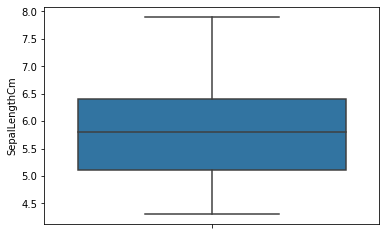

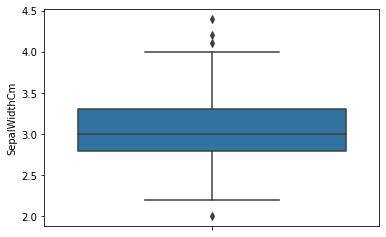

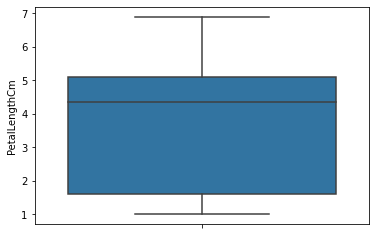

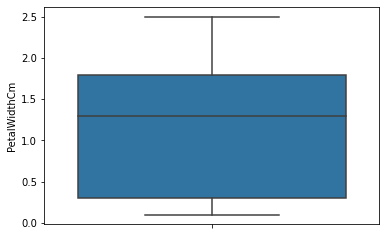

In [27]:
cols = iris.columns
for i in cols:
    sns.boxplot(y=iris[i])
    plt.show()

As we can see, in sepal width(cm) there are outliers.

##### Remove the outliers from sepal width (cm)

Old Shape:  (150, 4)
New Shape:  (146, 4)


<AxesSubplot:xlabel='SepalWidthCm'>

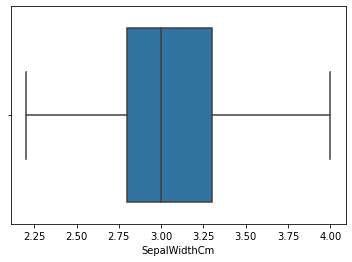

In [43]:
Q1 = np.percentile(iris['SepalWidthCm'], 25,
                interpolation = 'midpoint')
  
Q3 = np.percentile(iris['SepalWidthCm'], 75,
                interpolation = 'midpoint')
IQR = Q3 - Q1
  
print("Old Shape: ", iris.shape)

# Upper bound
upper = np.where(iris['SepalWidthCm'] >= (Q3+1.5*IQR))
  
# Lower bound
lower = np.where(iris['SepalWidthCm'] <= (Q1-1.5*IQR))
  
# Removing the Outliers
iris.drop(upper[0], inplace = True)
iris.drop(lower[0], inplace = True)
  
print("New Shape: ", iris.shape)

sns.boxplot(x='SepalWidthCm', data=iris)

We can see that after outlier treament the number of roses are reduced to 146 from 150

##### Standardizing to avoid bias

In [47]:
scaler = StandardScaler().fit(iris)
rescaledX = scaler.transform(iris)

##### To find the optium number of cluster

In [52]:
cluster_range = range(1,20)
cluster_errors = []

for num_cluster in cluster_range:
    clusters = KMeans(num_cluster,n_init = 10)
    clusters.fit(rescaledX)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
    
clusters_iris = pd.DataFrame({'num_cluster': cluster_range,'cluster_errors': cluster_errors})
clusters_iris[0:20]

C:\Users\SHUBHAM\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,num_cluster,cluster_errors
0,1,584.000000
1,2,218.934500
2,3,135.398152
3,4,110.681388
4,5,89.380638
5,6,79.096130
6,7,68.989960
7,8,61.754681
8,9,54.853431
9,10,46.049672


##### Plotting elbow curve to find the number of cluster

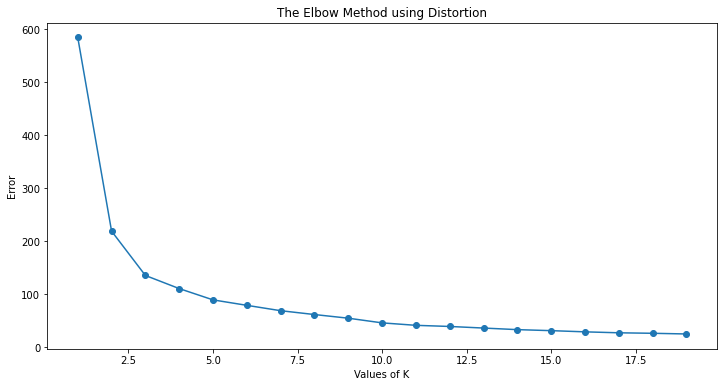

In [54]:
plt.figure(figsize = (12,6))
plt.plot(cluster_iris.num_cluster,clusters_iris.cluster_errors,marker ='o')
plt.xlabel('Values of K')
plt.ylabel('Error')
plt.title('The Elbow Method using Distortion') 
plt.show() 

From the above elbow curve we can say that '3' is the optiumn number of cluster

##### Creating object of the model and fitting it



In [56]:
model = KMeans(n_clusters = 3,max_iter = 50)
model.fit(iris)

KMeans(max_iter=50, n_clusters=3)

##### Analysis of cluster found

In [63]:
iris.index = pd.RangeIndex(len(iris.index))
iris_km = pd.concat([iris, pd.Series(model.labels_)], axis=1)
iris_km.columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'ClusterID']

km_clusters_Slength = pd.DataFrame(iris_km.groupby(['ClusterID']).agg({'sepal length (cm)':'mean'}))
km_clusters_Swidth = pd.DataFrame(iris_km.groupby(['ClusterID']).agg({'sepal width (cm)':'mean'}))
km_clusters_Plength = pd.DataFrame(iris_km.groupby(['ClusterID']).agg({'petal length (cm)':'mean'}))
km_clusters_Pwidth = pd.DataFrame(iris_km.groupby(['ClusterID']).agg({'petal width (cm)':'mean'}))

In [65]:
iris2= pd.concat([pd.Series([0,1,2]), km_clusters_Slength, km_clusters_Swidth, km_clusters_Plength, km_clusters_Pwidth
                ], axis=1)
iris2.columns = ['ClusterID','sepal length (cm)_mean','sepal width (cm)_mean','petal length (cm)_mean',
               'petal width (cm)_mean']
iris2.head()


,ClusterID,sepal length (cm)_mean,sepal width (cm)_mean,petal length (cm)_mean,petal width (cm)_mean
0,0,6.850000,3.073684,5.742105,2.071053
1,1,4.976596,3.365957,1.463830,0.244681
2,2,5.916393,2.760656,4.408197,1.440984


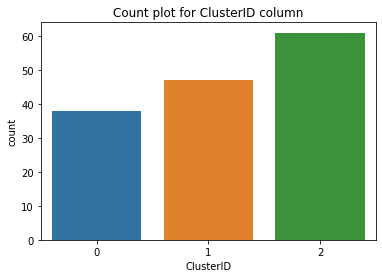

In [67]:
sns.countplot(x = iris_km.ClusterID)
plt.title('Count plot for ClusterID column')
plt.show()

##### Scatter plot to visualize the clusters

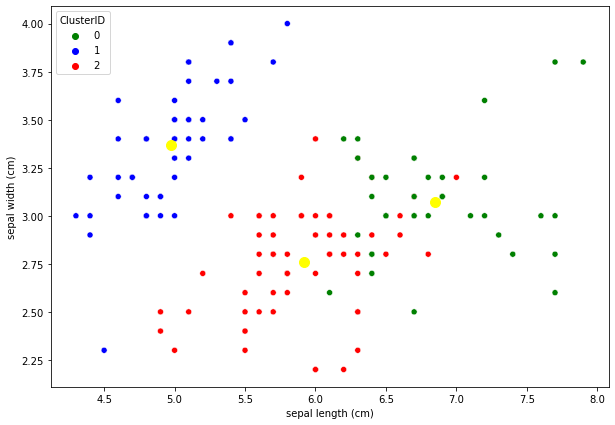

In [69]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='sepal length (cm)',y='sepal width (cm)', data=iris_km, hue='ClusterID', palette=['green','blue','red'])

# Plotting the centroids of the clusters
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.show()

From the above scatter plot we can say there are three clusters which are in yellow.